<a href="https://colab.research.google.com/github/berkaykoyuncu/python_codes/blob/master/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# Load the data
data = pd.read_csv('PF_daily.csv')

In [4]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Discharge'].values.reshape(-1, 1))

In [28]:
# Split the data into training and testing sets
train_ratio = 0.8  # Specify the ratio of training data
train_size = int(len(scaled_data) * train_ratio)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [29]:
# Prepare the training data
window_size = 10  # Specify the window size for the LSTM
X_train, y_train = [], []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
987/987 [==============================] - 47s 39ms/step - loss: 2.0149e-04
Epoch 2/5
987/987 [==============================] - 39s 40ms/step - loss: 2.7773e-05
Epoch 3/5
987/987 [==============================] - 37s 38ms/step - loss: 2.3439e-05
Epoch 4/5
987/987 [==============================] - 37s 37ms/step - loss: 1.9549e-05
Epoch 5/5
987/987 [==============================] - 39s 39ms/step - loss: 1.7983e-05


In [33]:
# Prepare the testing data
inputs = scaled_data[len(scaled_data) - len(test_data) - window_size:]
inputs = inputs.reshape(-1, 1)
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

220/220 [==============================] - 3s 10ms/step


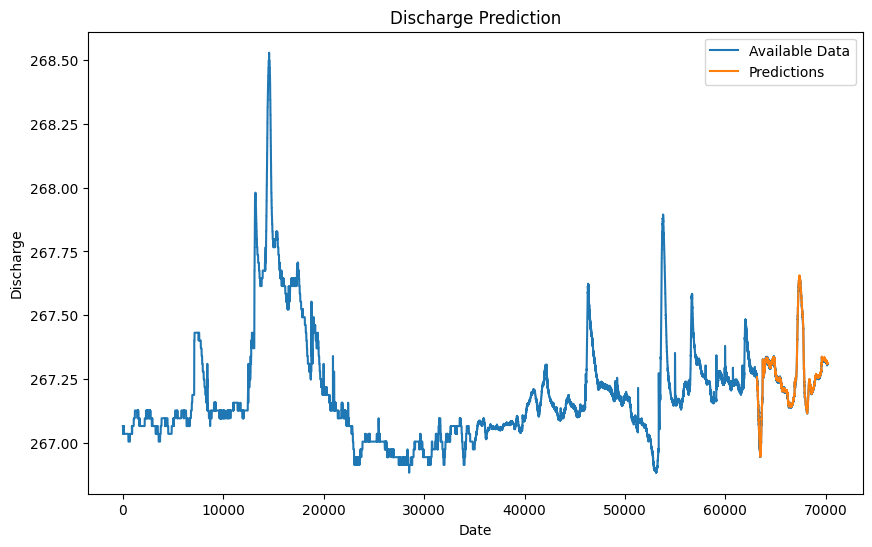

In [48]:
# Plot the available data and predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Discharge'], label='Available Data')
plt.plot(data['Date'].values[-len(predictions):], predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title('Discharge Prediction')
plt.legend()
plt.show()

In [49]:
print(predictions)

[[267.2572 ]
 [267.25607]
 [267.25665]
 ...
 [267.3121 ]
 [267.31174]
 [267.3112 ]]
